# Analysis of Geo-location Temperature Now & Hourly Forecast

# What is the latest temperature at all the locations?

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Database connection parameters
host="postgres"         # PGHOST
port=5432             # PGPORT
database="tomorrow"     # PGDATABASE
user="postgres"         # PGUSER
password="postgres"      # PGPASSWORD

# Connect to PostgreSQL using psycopg2
try:
    connection = psycopg2.connect(
        host=host,
        database=database,
        user=user,
        password=user,
        port=port
    )
    cursor = connection.cursor()
    print("Connection to PostgreSQL successful!")
except Exception as e:
    print(f"Error connecting to PostgreSQL: {e}")

query = """SELECT latitude, longitude, temperature, wind_speed, timestamp
FROM realtime_weather
WHERE timestamp = (SELECT MAX(timestamp) FROM realtime_weather);"""


# Execute the query and fetch data
try:
    cursor.execute(query)
    result = cursor.fetchall()
    print("Query executed successfully!")
except Exception as e:
    print(f"Error executing query: {e}")

# Close the cursor and connection after fetching data
cursor.close()
connection.close()

# Convert the result to a pandas DataFrame for easier manipulation
df = pd.DataFrame(result, columns=['latitude', 'longitude','temperature', 'wind_speed','timestamp'])
# Convert the timestamp column to datetime format if needed
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(df)

Connection to PostgreSQL successful!
Query executed successfully!
   latitude  longitude  temperature  wind_speed           timestamp
0     25.90     -97.52        28.13        2.50 2024-09-19 02:33:00
1     25.94     -97.48        28.50        2.88 2024-09-19 02:33:00
2     25.90     -97.40        28.81        3.13 2024-09-19 02:33:00
3     25.94     -97.54        28.38        3.19 2024-09-19 02:33:00
4     25.94     -97.52        28.38        3.19 2024-09-19 02:33:00
5     25.90     -97.44        28.69        2.50 2024-09-19 02:33:00
6     25.86     -97.42        28.19        3.31 2024-09-19 02:33:00
7     25.90     -97.48        28.13        2.38 2024-09-19 02:33:00
8     25.92     -97.38        28.38        3.50 2024-09-19 02:33:00
9     25.94     -97.44        28.63        2.88 2024-09-19 02:33:00


# Plotting Temperature Hourly Forecast

You can adjust the lat and lon values (so long as is a pair existing in the db) to plot different locations.

Connection to PostgreSQL successful!
Query executed successfully!


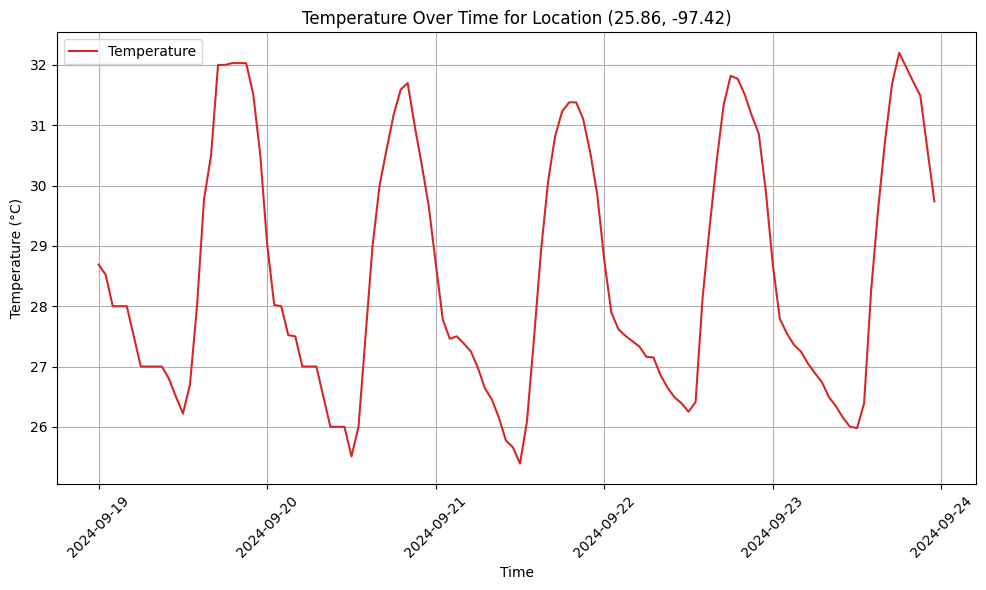

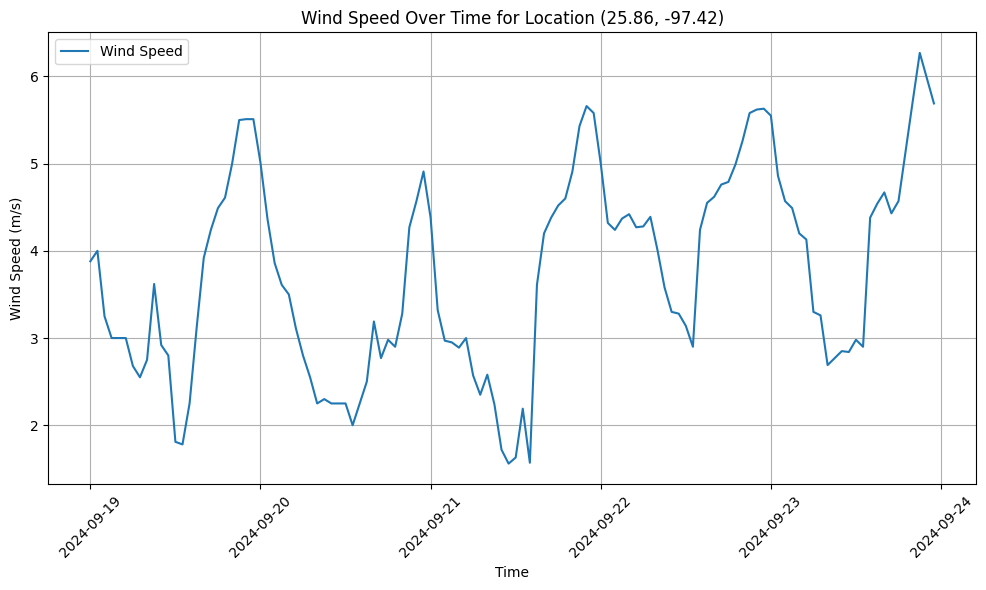

In [12]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Database connection parameters
host="postgres"         # PGHOST
port=5432             # PGPORT
database="tomorrow"     # PGDATABASE
user="postgres"         # PGUSER
password="postgres"      # PGPASSWORD

# location to plot
lat = 25.8600
lon = -97.4200

# Connect to PostgreSQL using psycopg2
try:
    connection = psycopg2.connect(
        host=host,
        database=database,
        user=user,
        password=user,
        port=port
    )
    cursor = connection.cursor()
    print("Connection to PostgreSQL successful!")
except Exception as e:
    print(f"Error connecting to PostgreSQL: {e}")

# Query to get weather data for a specific geolocation
query = f"""
    SELECT timestamp, temperature, wind_speed 
    FROM hourly_weather 
    WHERE latitude = {lat} AND longitude = {lon}
      AND timestamp >= NOW() - INTERVAL '1 hour'
    ORDER BY timestamp ASC;
"""


# Execute the query and fetch data
try:
    cursor.execute(query)
    result = cursor.fetchall()
    print("Query executed successfully!")
except Exception as e:
    print(f"Error executing query: {e}")

# Close the cursor and connection after fetching data
cursor.close()
connection.close()

# Convert the result to a pandas DataFrame for easier manipulation
df = pd.DataFrame(result, columns=['timestamp', 'temperature', 'wind_speed'])

# Convert the timestamp column to datetime format if needed
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot temperature over time
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['temperature'], label="Temperature", color='tab:red')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title(f'Temperature Over Time for Location ({lat}, {lon})')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, plot wind speed over time as well
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['wind_speed'], label="Wind Speed", color='tab:blue')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'Wind Speed Over Time for Location ({lat}, {lon})')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
